In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [57]:
train = pd.read_csv(r"C:\Users\ADITYA\Desktop\Datasets\twitter_dataset\twitter_training.csv")
test = pd.read_csv(r"C:\Users\ADITYA\Desktop\Datasets\twitter_dataset\twitter_validation.csv")
print(train.shape)
print(test.shape)

(74681, 4)
(999, 4)


In [58]:
train.columns=['id','information','type','text']
train

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [59]:
test.columns=['id','information','type','text']
test

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [60]:
train.isnull().any()
test.isnull().any()

id             False
information    False
type           False
text           False
dtype: bool

In [61]:
train.groupby('type').describe()   

id                                                           \
              count         mean          std   min     25%     50%      75%   
type                                                                           
Irrelevant  12990.0  5928.771363  3616.510316   5.0  2942.0  5153.0   9369.0   
Negative    22542.0  6760.267767  3479.188211   1.0  3825.0  7105.0   9384.0   
Neutral     18318.0  6494.270881  3959.853892   3.0  3173.0  6904.0  10011.0   
Positive    20831.0  6338.113821  3850.921687  12.0  2755.0  6001.0   9708.5   

                     
                max  
type                 
Irrelevant  13200.0  
Negative    13194.0  
Neutral     13197.0  
Positive    13198.0

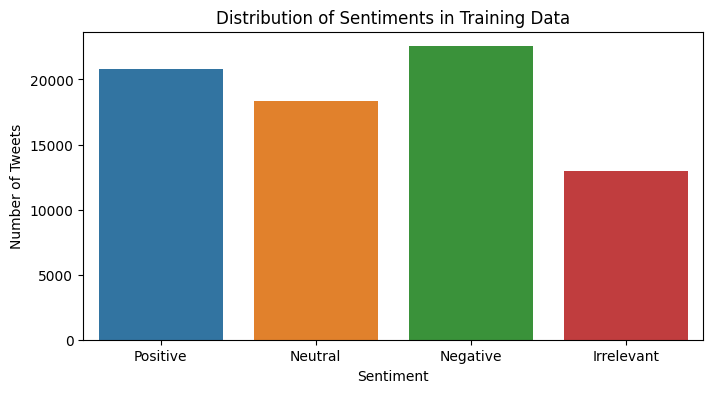

In [62]:
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=train, hue='type', legend=False)
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [63]:
train.columns

Index(['id', 'information', 'type', 'text'], dtype='object')

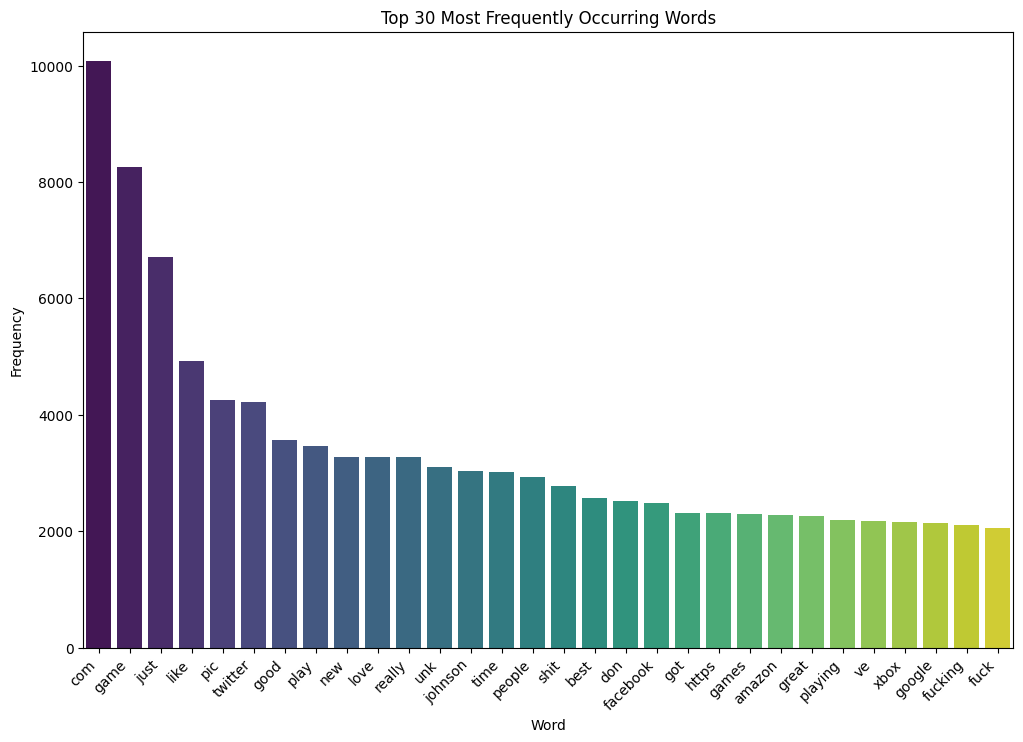

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
train['text'] = train['text'].fillna('')

vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(train['text'])
word_frequencies = np.asarray(X.sum(axis=0)).ravel()
feature_names = np.array(vectorizer.get_feature_names_out())

sorted_indices = np.argsort(word_frequencies)[::-1]
word_frequencies = word_frequencies[sorted_indices]
feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_names[:30], y=word_frequencies[:30], hue=feature_names[:30], legend=False, palette='viridis')
plt.title('Top 30 Most Frequently Occurring Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

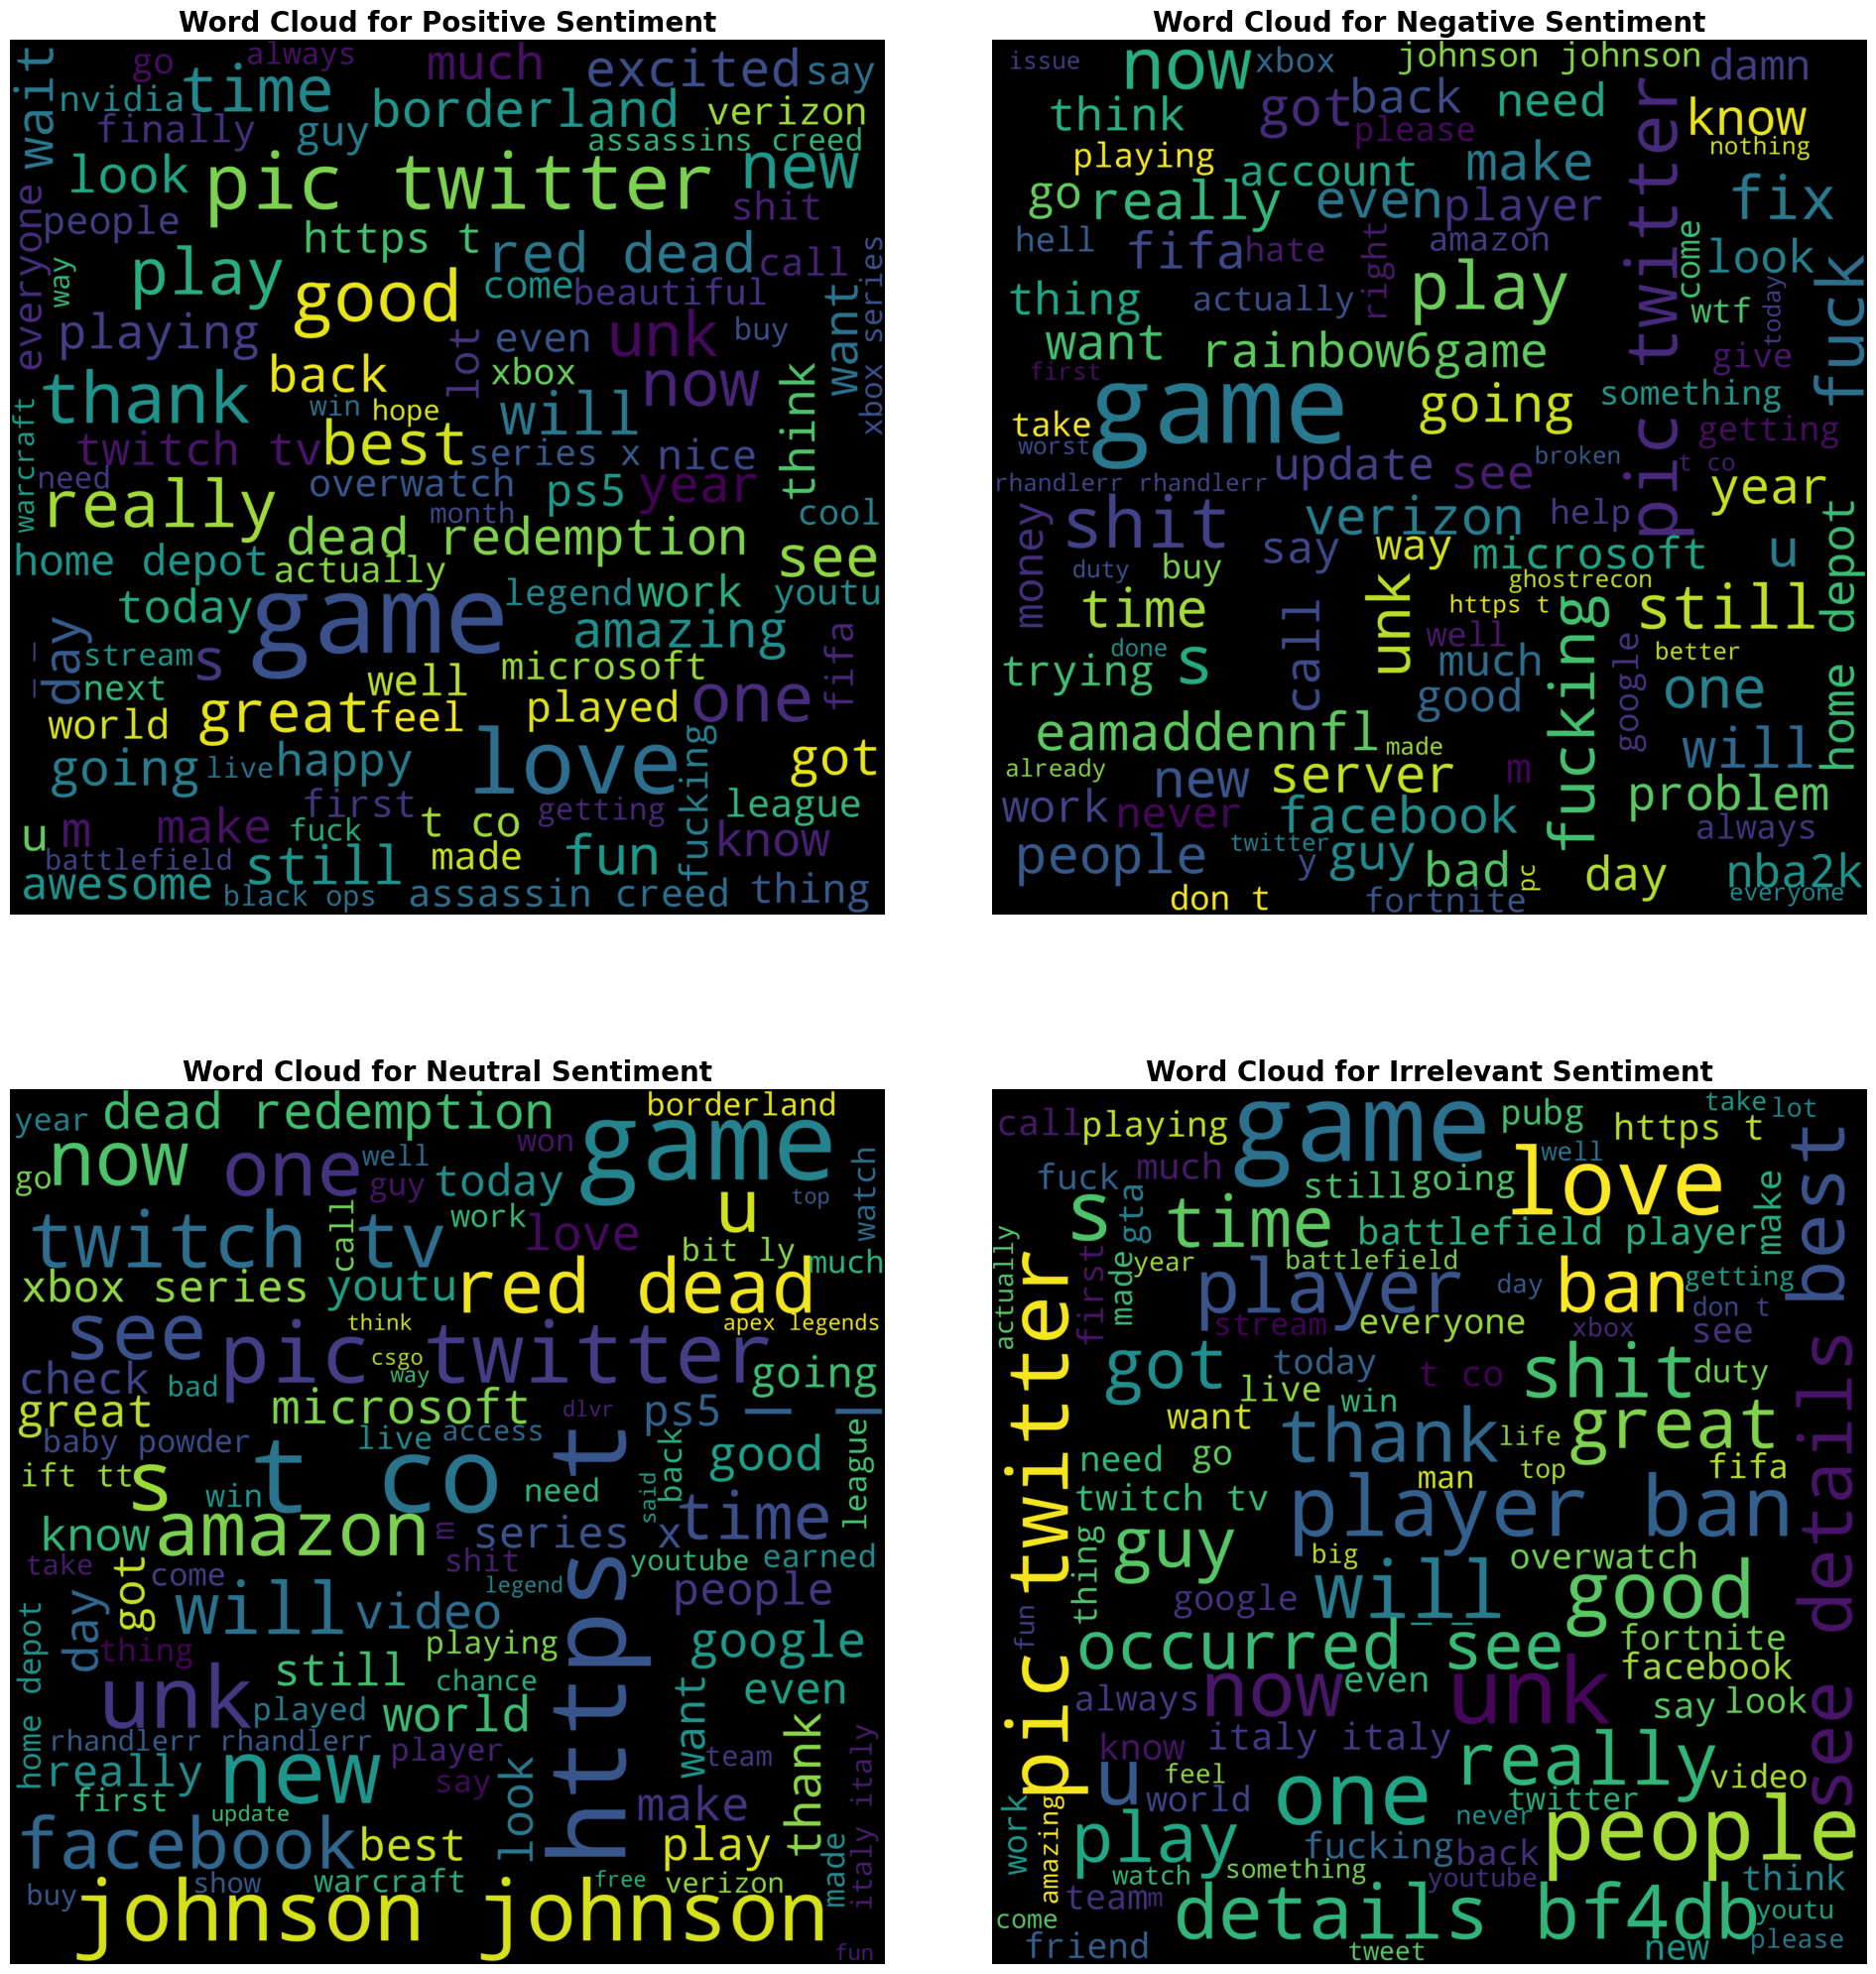

In [65]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment_type, text_column, title, position):
    sentiment_text = ' '.join(train[train["type"] == sentiment_type][text_column].str.lower())
    wordcloud = WordCloud(
        max_font_size=100,
        max_words=100,
        background_color="black",
        scale=10,
        width=800,  
        height=800
    ).generate(sentiment_text)
    
    plt.subplot(2, 2, position) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20, fontweight='bold')
plt.figure(figsize=(20, 20))
generate_wordcloud("Positive", "text", "Word Cloud for Positive Sentiment", 1)
generate_wordcloud("Negative", "text", "Word Cloud for Negative Sentiment", 2)
generate_wordcloud("Neutral", "text", "Word Cloud for Neutral Sentiment",3)
generate_wordcloud("Irrelevant", "text", "Word Cloud for Irrelevant Sentiment",4)
plt.tight_layout() 
plt.subplots_adjust(hspace=0.2)
plt.show()


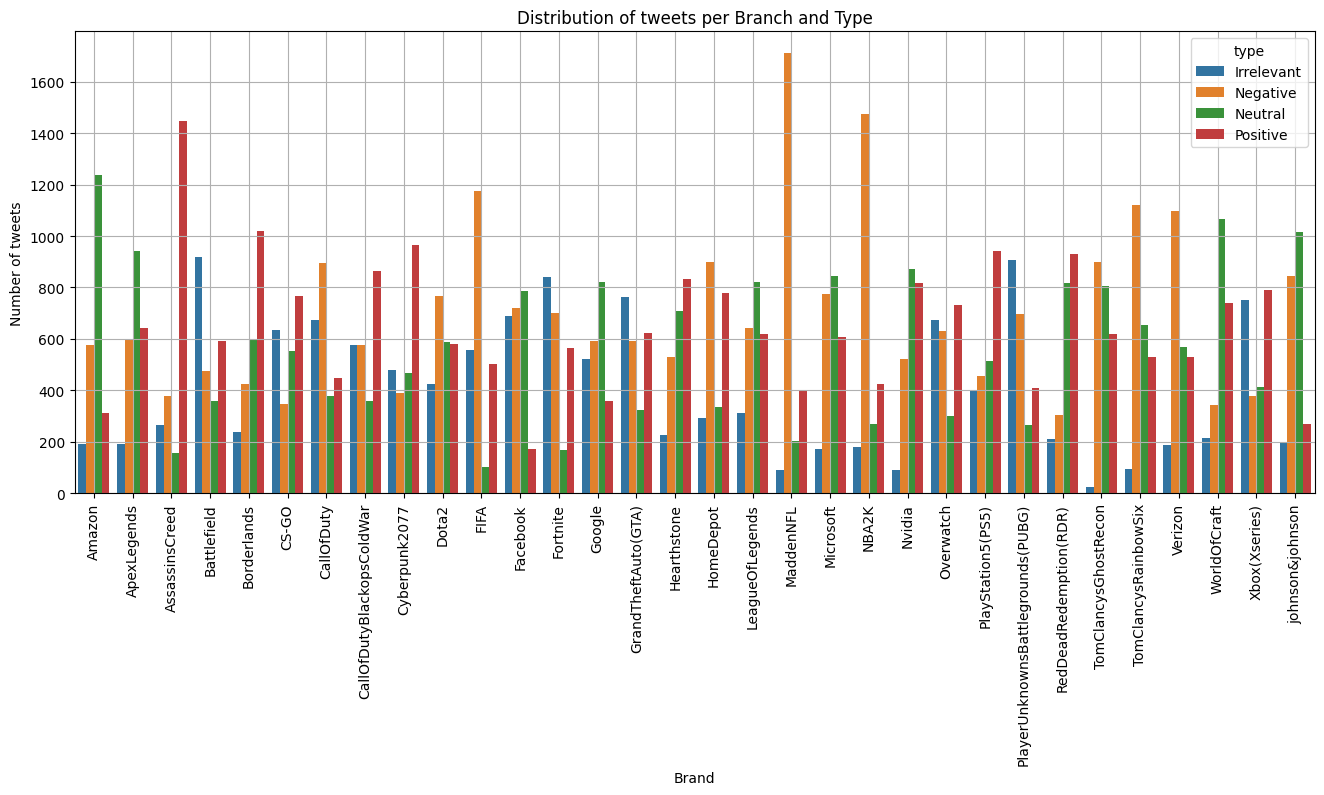

In [66]:
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()
plt.figure(figsize=(16,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

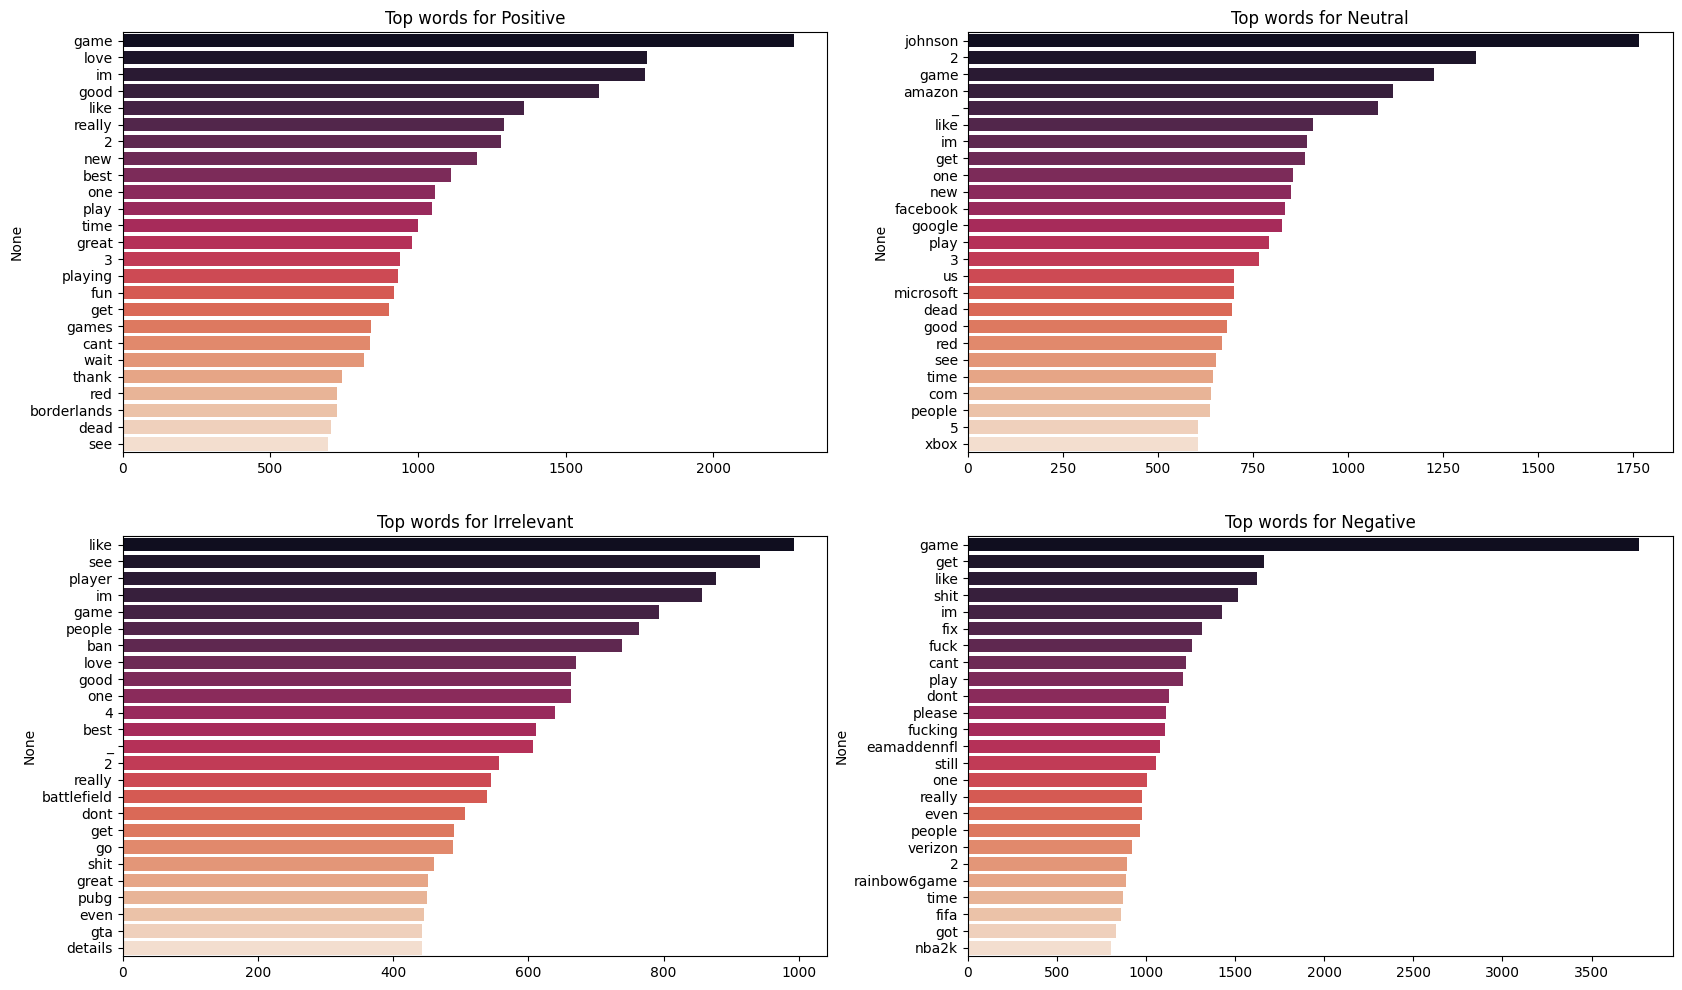

In [67]:
import re
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
word_counts = {'Positive': [],
               'Neutral': [],
               'Irrelevant': [],
               'Negative': []}

pattern = re.compile('[^\w ]')
for text, t in zip(train['text'], train['type']):
    text = re.sub(pattern, '', text).lower().split()
    text = [word for word in text if word not in stopwords_list]
    word_counts[t].extend(text)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis, hue=bar_info.index, palette='rocket')
    axis.set_title(f'Top words for {target}')
plt.show()

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [69]:
train = pd.read_csv(r"C:\Users\ADITYA\Desktop\Datasets\twitter_dataset\twitter_training.csv")
train.columns = ['id', 'information', 'type', 'text']
train['text'] = train['text'].fillna('')

In [70]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

train['clean_text'] = train['text'].apply(preprocess_text)

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(train['clean_text'], train['type'], test_size=0.25, random_state=42)

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

In [73]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)
y_train_pred = model.predict(X_train_tfidf)
y_valid_pred = model.predict(X_valid_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2%}')

valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.2%}')

Training Accuracy: 95.83%
Validation Accuracy: 88.11%


In [74]:
print("\nClassification Report:\n")
classification_rep = classification_report(y_valid, y_valid_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
print(classification_df)


Classification Report:

              precision    recall  f1-score       support
Irrelevant     0.943657  0.809669  0.871543   3289.000000
Negative       0.910165  0.896311  0.903185   5584.000000
Neutral        0.904527  0.865156  0.884404   4457.000000
Positive       0.809430  0.922486  0.862268   5341.000000
accuracy       0.881099  0.881099  0.881099      0.881099
macro avg      0.891945  0.873405  0.880350  18671.000000
weighted avg   0.885903  0.881099  0.881423  18671.000000


In [75]:
new_text = ["My man, you're the best." ,"I hate this stupid algorithm"
            ,"Check out this epic streamer!.","If I had to guess why cross-play took so long"]

new_text_tfidf = tfidf_vectorizer.transform(new_text)
new_text_pred = model.predict(new_text_tfidf)
for text, sentiment in zip(new_text, new_text_pred):
    print(f"Text: '{text}' -> {sentiment}")

Text: 'My man, you're the best.' -> Positive
Text: 'I hate this stupid algorithm' -> Negative
Text: 'Check out this epic streamer!.' -> Neutral
Text: 'If I had to guess why cross-play took so long' -> Irrelevant
